In [19]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import os
# os.chdir('/Users/ywu/InSync/2021_MPIE/2021-12_H Diffusion/DNN_Model/')

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

data_path = '/Users/ywu/InSync/2021_MPIE/2021-12_H Diffusion/ANN model/Dataset_Cleaned/'


Current working directory: /Users/ywu/InSync/2021_MPIE/2021-12_H Diffusion/ANN model/FORGE_PCA


### Import hardness dataset

In [21]:
# define an empty df with column head defined
df_compo = pd.DataFrame(columns=['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'])
 
# import Hardness dataset
df_H = pd.read_excel(data_path + 'Hardness_database_YW_v3.xlsx', header=2)

display(df_H.columns)

# obtain the 2 inputs and 1 output from this dataset
df_H_compo  = pd.concat([df_compo, df_H[['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf']]], axis=0, ignore_index=True)
df_H_compo = df_H_compo.fillna(0) # fill in the nan by zero
display(df_H_compo.head(1))


Index(['Alloy ID', 'Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf', 'delta_a',
       'Hmix', 'VEC', 'sigma_bulk_modulus', 'converted HV'],
      dtype='object')

,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,19.92,18.54,20.93,0.0,0.0,0,0.0,0.0,0.0,19.59,0.0,0.0,0.0,0.0,0.0,21.02,0,0.0,0.0,0.0


### Import corrosion dataset

In [22]:
# import corrosion dataset
df_C = pd.read_excel(data_path + 'Corrosion_database_YW_v3.xlsx', header=2)

# obtain the 2 inputs and 1 output from this dataset
df_C_compo  = pd.concat([df_compo, df_C[['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn',
       'Cu', 'Al', 'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y']]], axis=0, ignore_index=True)
df_C_compo = df_C_compo.fillna(0) # fill in the nan by zero
print(df_C_compo.columns)

display(df_C_compo.head(1))

Index(['Fe', 'Cr', 'Ni', 'Mo', 'W', 'N', 'Nb', 'C', 'Si', 'Mn', 'Cu', 'Al',
       'V', 'Ta', 'Ti', 'Co', 'Mg', 'Y', 'Zr', 'Hf'],
      dtype='object')


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,Cu,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [24]:

# corrosion data 
df_C_compo = df_C_compo.assign(dataset='corrosion data')
display(df_C_compo.tail(2), df_C_compo.shape)

# hardness data 
df_H_compo = df_H_compo.assign(dataset='hardness data')
display(df_H_compo.tail(2), df_H_compo.shape)

# concatenated data 
df_conc = pd.concat([df_C_compo, df_H_compo], ignore_index=True)
df_conc.to_excel('checkcheck.xlsx')
display(df_conc.head(2))
display(df_conc.tail(2), df_conc.shape)


------------------------------------
----- corrosion data ---------------
------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
710,0.002,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.002,1.30,...,98.689,0.0,0.0,0.0,0.0,0.00,0.0,0,0,corrosion data
711,0.160,0.23,0.0,0.0,0.0,0.0,0.0,0.0,0.080,0.02,...,97.040,0.0,0.0,0.0,0.0,2.43,0.0,0,0,corrosion data


(712, 21)

------------------------------------
----- hardness data ----------------
------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
678,21.72,20.23,22.83,0.00,0.0,0,0.0,0.0,0.0,0.0,...,10.5,0.0,0.0,0.0,0.00,0,0.0,0.0,0.0,hardness data
679,20.17,0.00,42.40,6.93,0.0,0,0.0,0.0,0.0,0.0,...,0.0,9.2,0.0,0.0,21.29,0,0.0,0.0,0.0,hardness data


(680, 21)

------------------------------------
----- concatenated data ------------
------------------------------------


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
0,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,corrosion data
1,69.77,18.0,10.0,0.0,0.0,0.0,0.0,0.03,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,corrosion data


,Fe,Cr,Ni,Mo,W,N,Nb,C,Si,Mn,...,Al,V,Ta,Ti,Co,Mg,Y,Zr,Hf,dataset
1390,21.72,20.23,22.83,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,10.5,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,hardness data
1391,20.17,0.00,42.40,6.93,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.2,0.0,0.0,21.29,0.0,0.0,0.0,0.0,hardness data


(1392, 21)

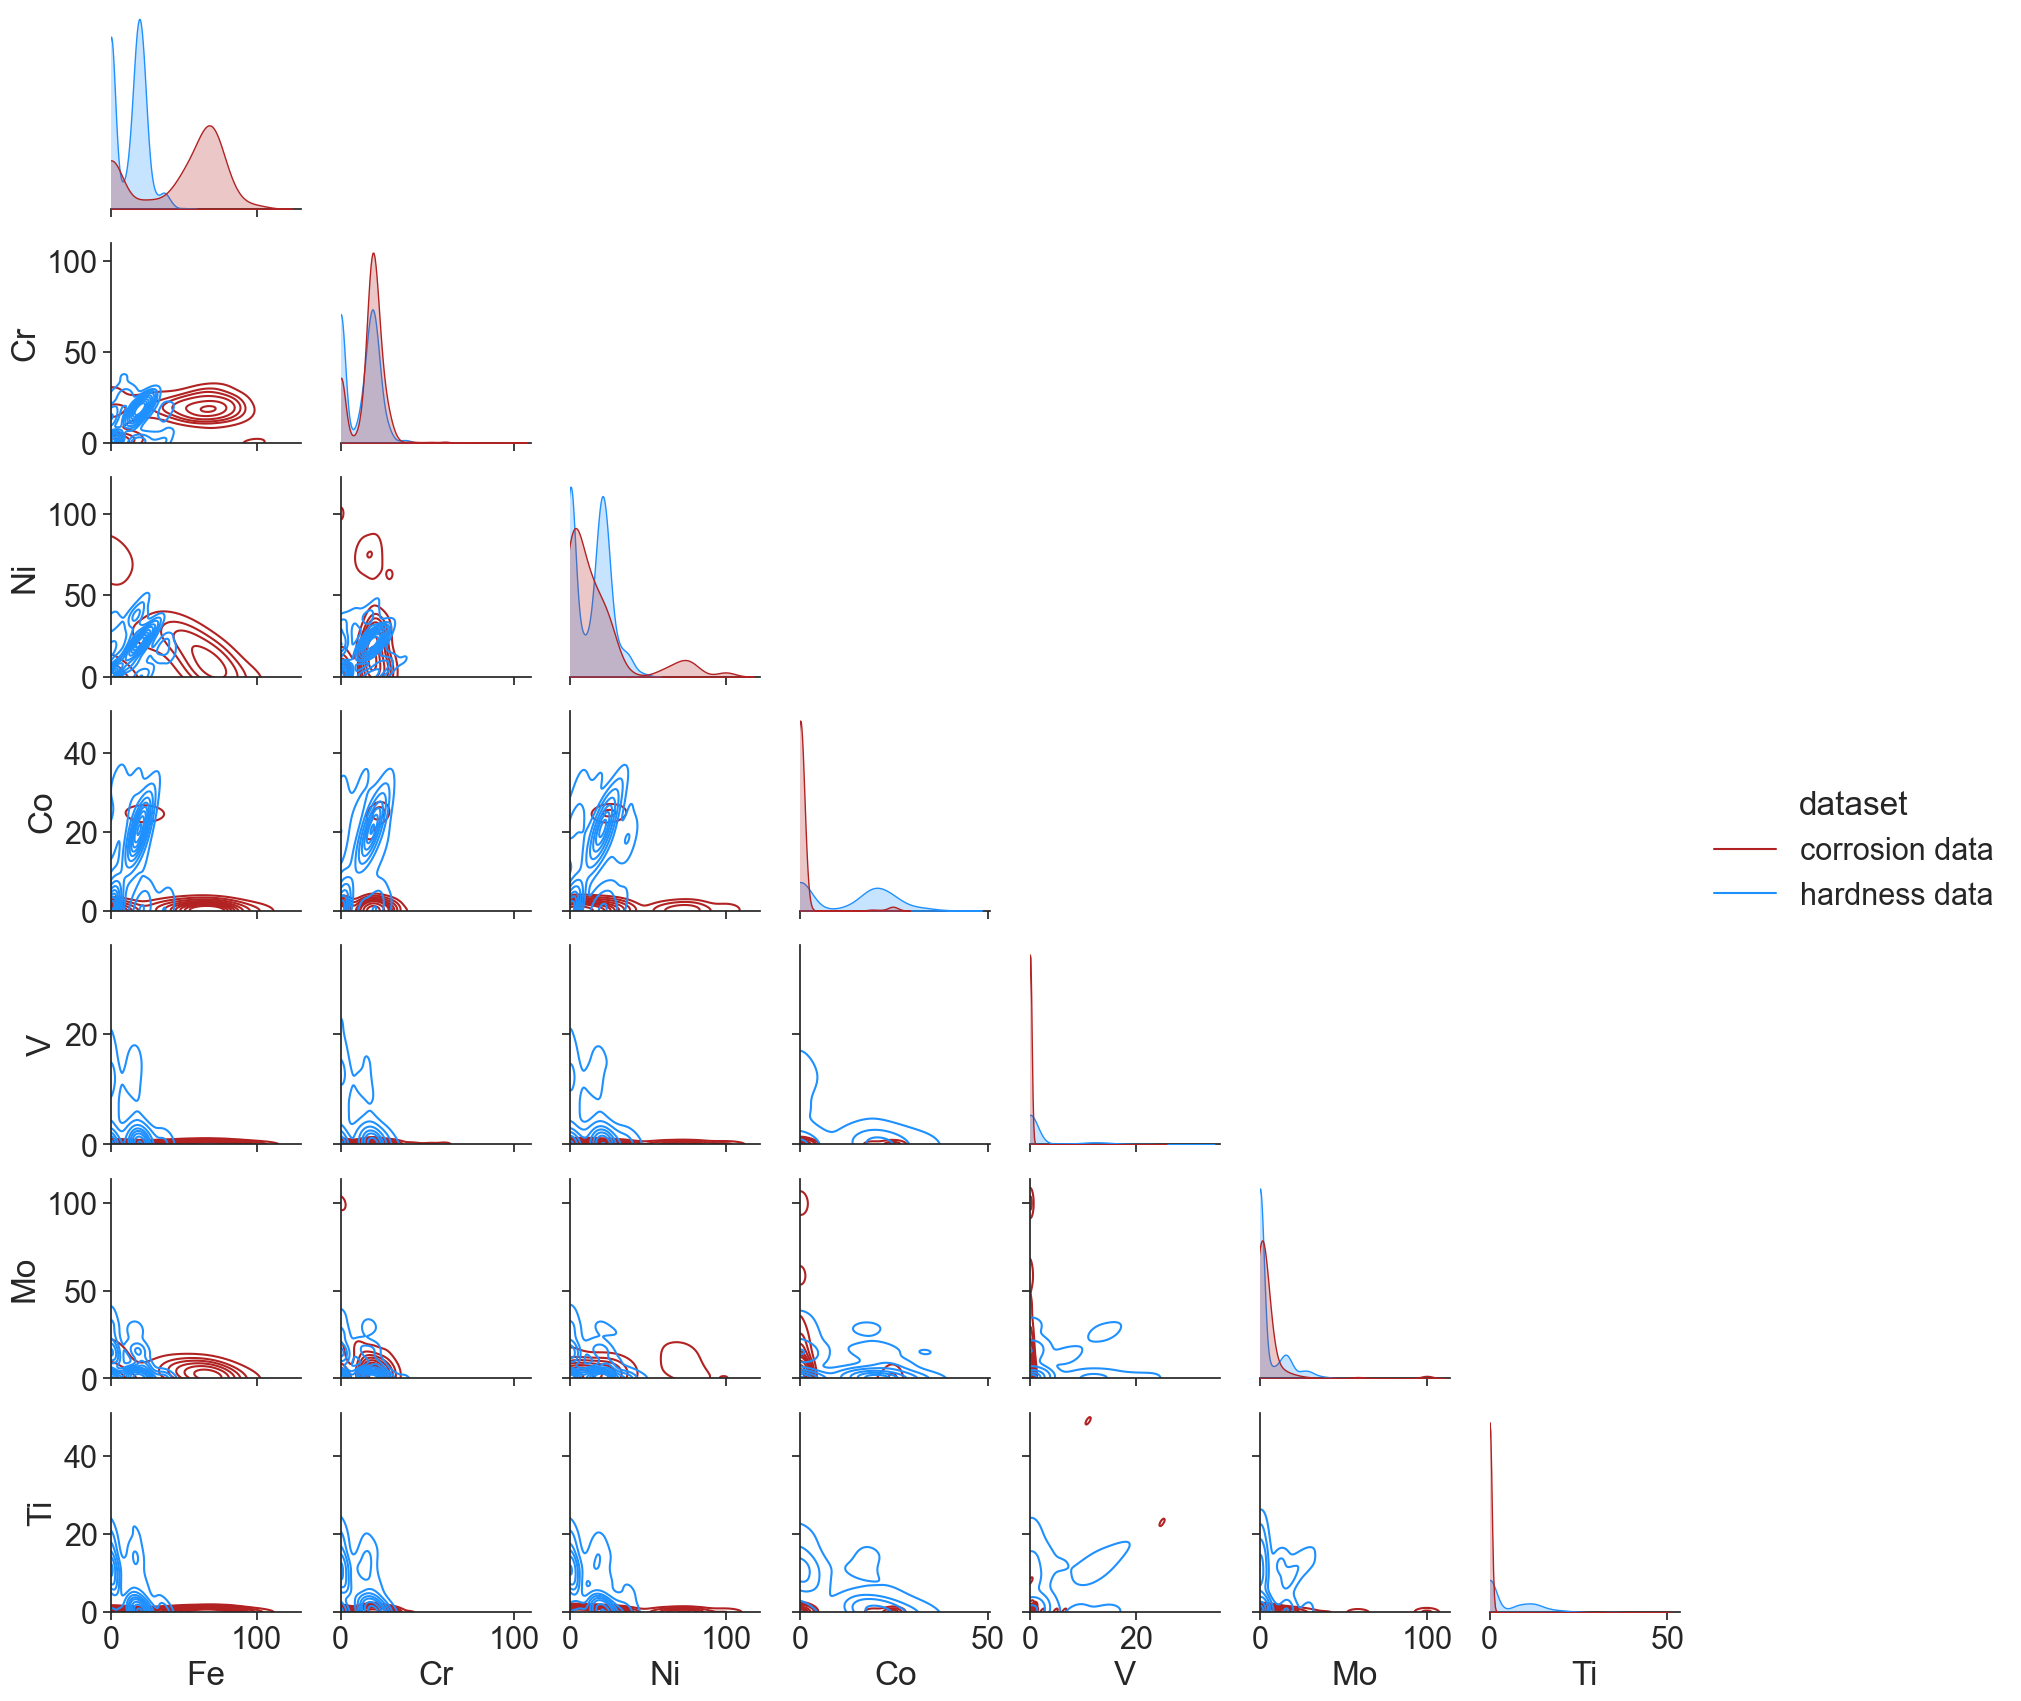

In [53]:
# Assuming df_conc is your DataFrame and 'Fe', 'Cr', 'Ni' are its columns
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook", font_scale=2)

# Let's define the palette before using it in the pairplot
# palette = sns.color_palette("Spectral", n_colors=2)
palette = ["firebrick", "dodgerblue"]

grid = sns.pairplot(df_conc, vars=['Fe', 'Cr', 'Ni', 'Co', 'V', 'Mo', 'Ti'], 
                    kind="kde", corner=True, hue="dataset", palette=palette)

# Loop through the axes (which are in a 2D array) to set the x and y limits
for i in range(len(grid.axes)):
    for j in range(len(grid.axes[i])):
        ax = grid.axes[i][j]
        # Ensure the current axis is not None before setting limits and ticks
        if ax is not None:
            ax.set_xlim(left=0)  # This sets the lower limit to 0, but leaves the upper limit unchanged
            ax.set_ylim(bottom=0)  # This sets the lower limit to 0, but leaves the upper limit unchanged

# Save the figure
plt.savefig('pairplot_small.png')

# Display the plot
plt.show()


### Taylor2018: Taylor et al._Integrated computational materials engineering of corrosion resistant alloys_2018.pdf


Marcus's conceptual model to explain the ability of alloying elements to impart localized corrosion resistance

* others: 'Fe', 'Ni', 'Co', 'Cu', 'Si'
* Passivity promotor: 'Cr', 'Ti', 'Al', 'V', 'Mn' 
* Dissolution blocker: 'Mo', 'W', 'Nb', 'Ta'

 


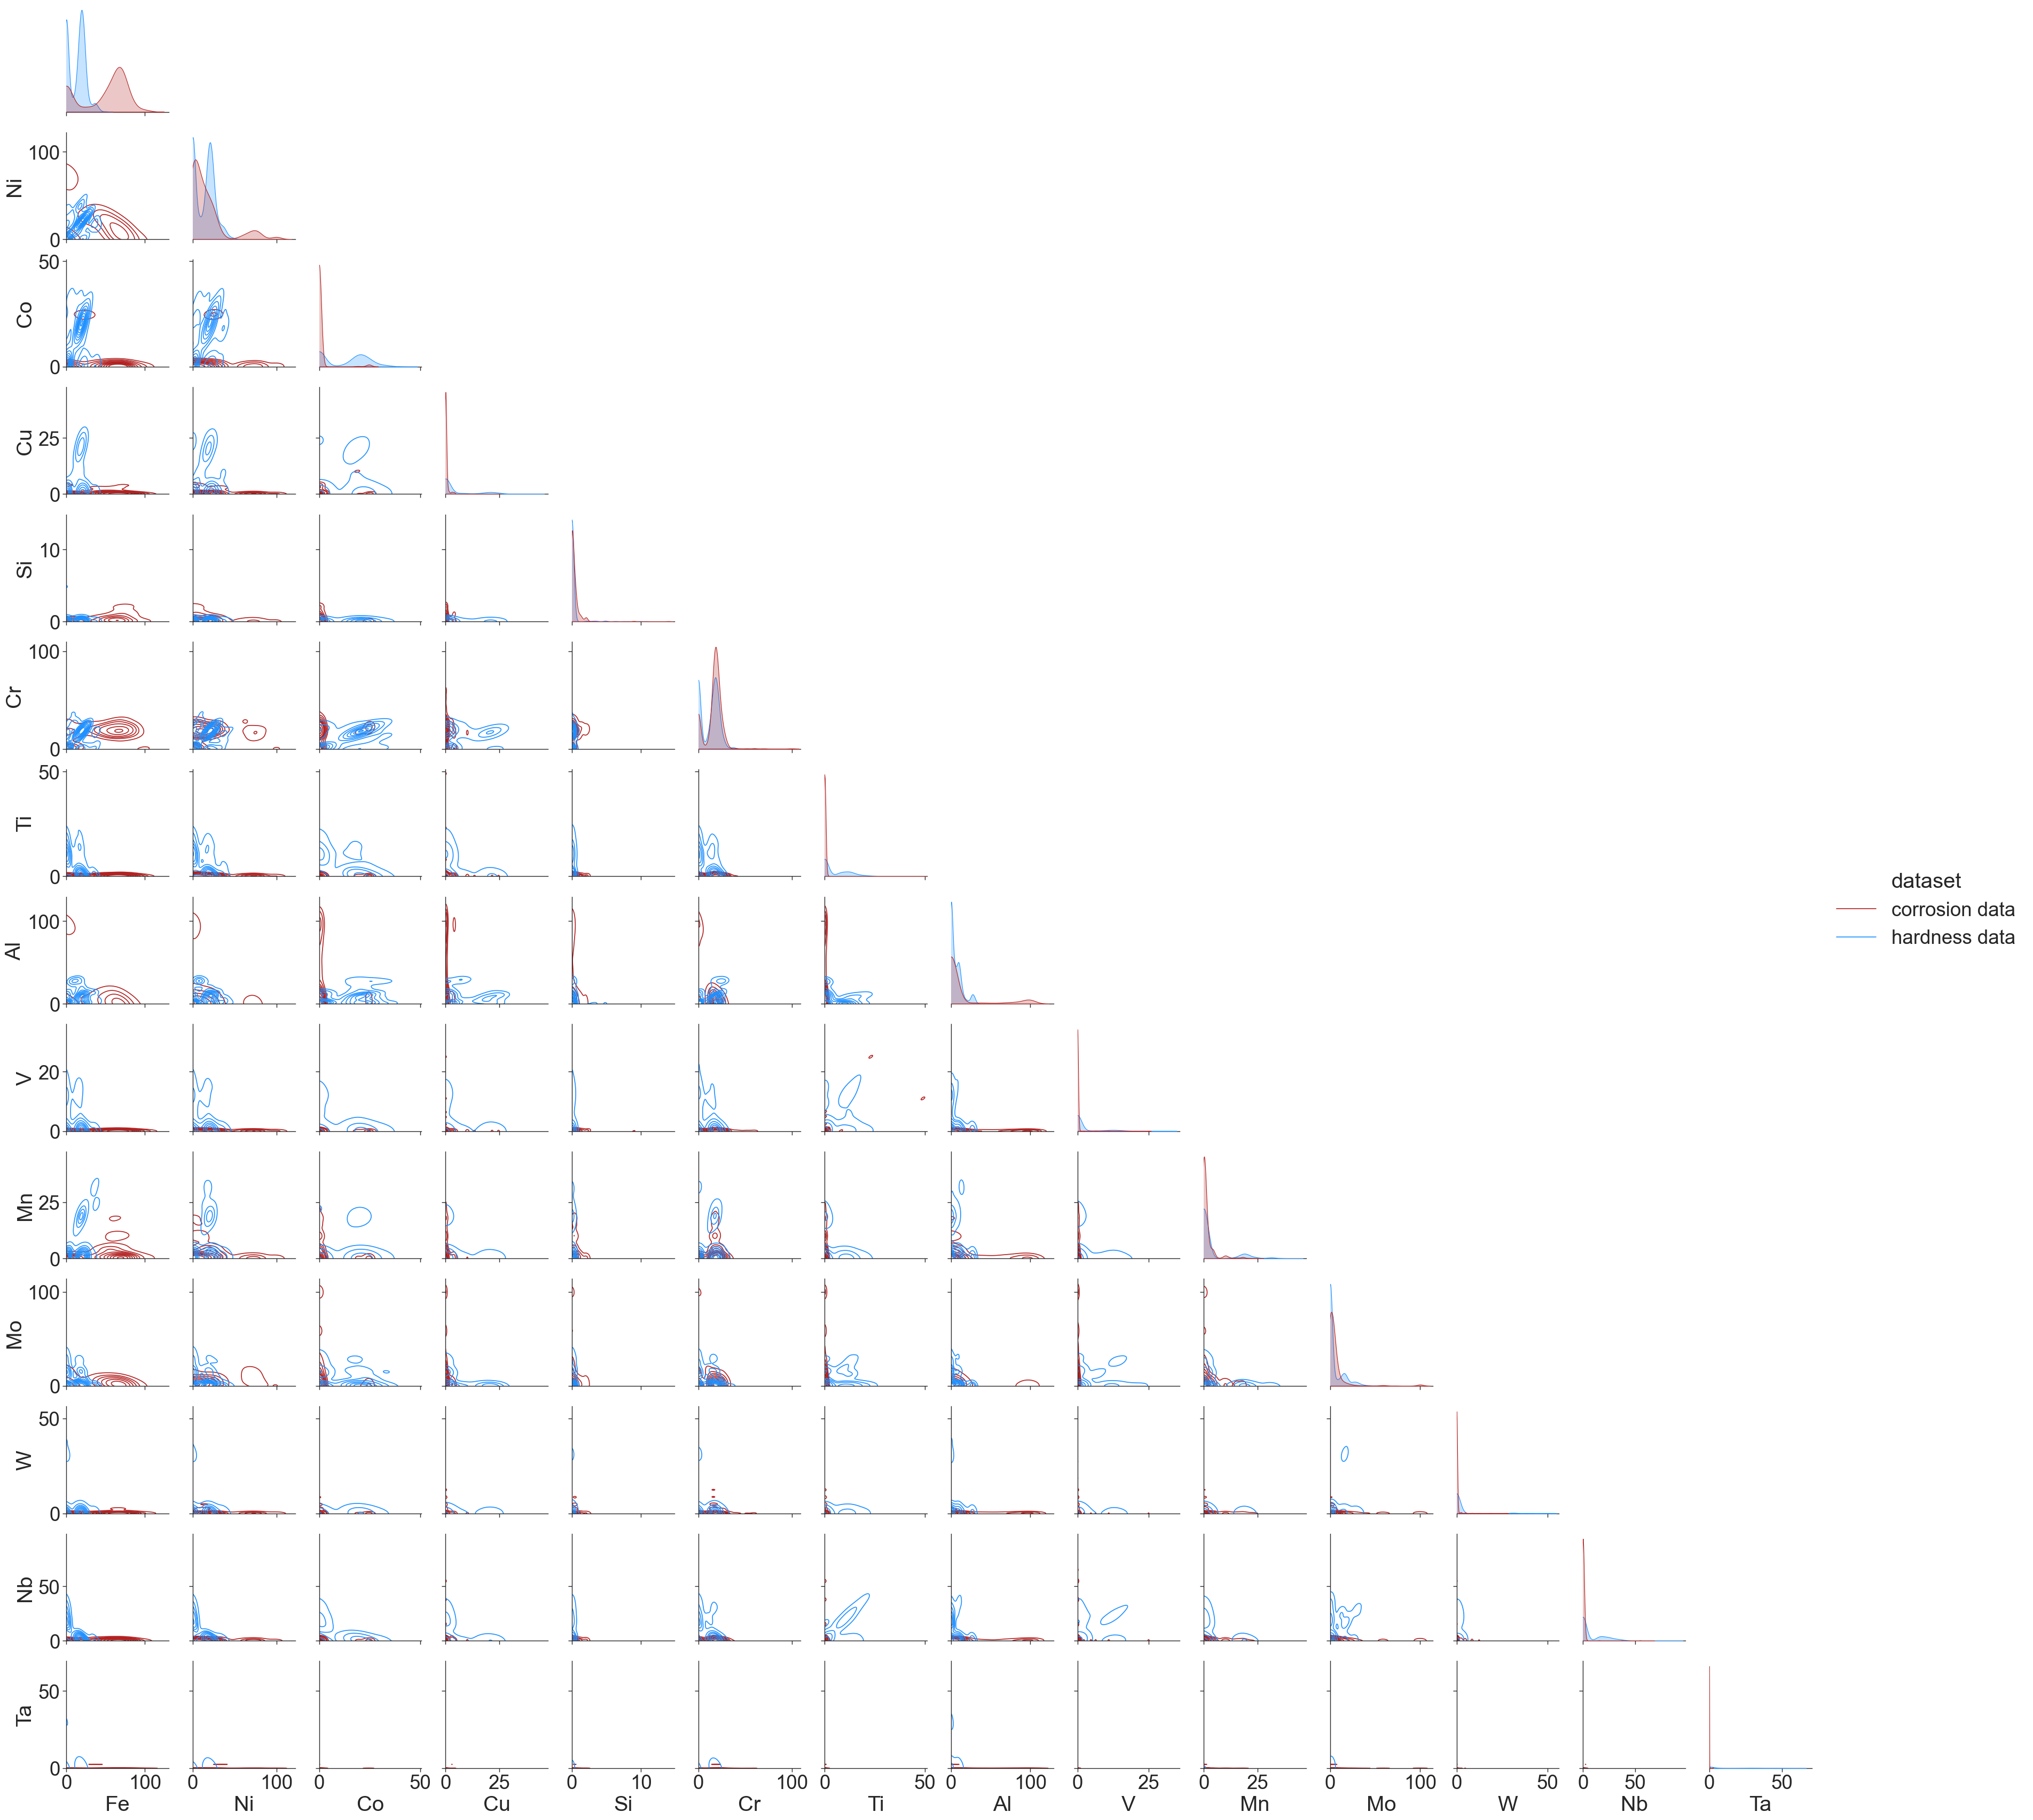

In [52]:
# Assuming df_conc is your DataFrame and 'Fe', 'Ni', 'Co', etc. are its columns
sns.set(style="ticks", color_codes=True)
sns.set_context("paper", font_scale=3)

# Let's define the palette before using it in the pairplot
palette = ["firebrick", "dodgerblue"]

sns_fig = sns.pairplot(df_conc,vars=['Fe', 'Ni', 'Co', 'Cu', 'Si', 'Cr', 'Ti', 'Al', 'V', 'Mn', 'Mo', 'W', 'Nb', 'Ta'], 
                       kind="kde", corner=True, hue="dataset", palette=palette)  # Increase line thickness here

# Loop through the axes (which are in a 2D array) to set the x and y limits
for i in range(len(sns_fig.axes)):
    for j in range(len(sns_fig.axes[i])):
        ax = sns_fig.axes[i][j]
        # Ensure the current axis is not None before setting limits
        if ax is not None:
            ax.set_xlim(left=0)  # This sets the lower limit to 0, but leaves the upper limit unchanged
            ax.set_ylim(bottom=0)  # This sets the lower limit to 0, but leaves the upper limit unchanged

# Save the plot
sns_fig.savefig('pairplot_full.png')

# Display the plot
plt.show()